# Exploratory Data Analysis - Employee Dimension Data
This notebook performs EDA on the `dim_employees_anon.csv` file from the Data Edge Internal Data folder.

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')


In [3]:
# Set Data Directory Path
data_dir = r"c:\Users\guine\Documents\BC#4\Hyper_python\BI project\Data Edge Internal Data"
file_path = os.path.join(data_dir, "dim__notion_hr__anonymized.csv")

# Verify file exists
if os.path.exists(file_path):
    print(f"✓ File found: {file_path}")
    print(f"File size: {os.path.getsize(file_path)} bytes")
else:
    print(f"✗ File not found: {file_path}")

✓ File found: c:\Users\guine\Documents\BC#4\Hyper_python\BI project\Data Edge Internal Data\dim__notion_hr__anonymized.csv
File size: 997 bytes


In [4]:
# Load Employee Data
try:
    df_hr = pd.read_csv(file_path)
    print("✓ Data loaded successfully!")
    print(f"Dataset shape: {df_hr.shape}")
except Exception as e:
    print(f"✗ Error loading data: {e}")

✓ Data loaded successfully!
Dataset shape: (13, 6)


## Dataset Overview

In [5]:
# Basic Information
print("=== BASIC INFORMATION ===")
print(f"Shape: {df_hr.shape}")
print(f"Columns: {list(df_hr.columns)}")
print(f"Data types:\n{df_hr.dtypes}")
print(f"\nMemory usage: {df_hr.memory_usage(deep=True).sum() / 1024:.2f} KB")

=== BASIC INFORMATION ===
Shape: (13, 6)
Columns: ['consultant_id', 'active', 'startdate', 'enddate', 'seniority', 'consultant_name_anon']
Data types:
consultant_id            object
active                   object
startdate                object
enddate                 float64
seniority                object
consultant_name_anon     object
dtype: object

Memory usage: 4.68 KB


In [6]:
# First Few Rows
print("=== FIRST 5 ROWS ===")
display(df_hr.head())

print("\n=== LAST 5 ROWS ===")
display(df_hr.tail())

=== FIRST 5 ROWS ===


,consultant_id,active,startdate,enddate,seniority,consultant_name_anon
0,2a554628-d7f2-475f-8872-5a7057388c36,No,2024-08-19,NaN,K2,Bertil Grind
1,261b42da-30b3-801f-ade8-e0f9f5d087b6,Yes,2025-09-01,NaN,K2,Alexander Macedon
2,261b42da-30b3-8088-b413-f0676fb78aa4,NaN,2025-09-01,NaN,K1,Luke Rhinehart
3,086ef6c0-d4f2-45bb-bf64-2cb51ce8fec4,Yes,2023-09-04,NaN,K1,Rachel Lamb
4,afd559ec-90bf-40c9-8e96-57e3d7af66fd,Yes,2023-03-13,NaN,K2,Astarion Baldursson



=== LAST 5 ROWS ===


,consultant_id,active,startdate,enddate,seniority,consultant_name_anon
8,61948bc5-3844-4219-a605-94e22f59571a,Yes,2023-12-01,NaN,K3,Marlen Haushofer
9,40d8972b-c3ad-450e-a56d-873a8cdc4368,Yes,2019-12-01,NaN,K3,Ilya Altman
10,d2458d77-5056-43b5-82c4-12543225bcd9,Yes,2020-10-01,NaN,K3,Jana Björk
11,8b3bf3a7-ae48-4c80-8b37-b3bb0796aea2,Yes,2019-05-01,NaN,K3,Haruki Taleb
12,348c564a-f3b1-42f9-95e5-cd6a9ca66aa7,Yes,2020-10-01,NaN,K4,Erroll Datasson


## Data Quality Assessment

In [7]:
# Missing Values Analysis
print("=== MISSING VALUES ===")
missing_data = df_hr.isnull().sum()
missing_percent = (missing_data / len(df_hr)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

# Duplicates
print(f"\n=== DUPLICATES ===")
print(f"Total duplicated rows: {df_hr.duplicated().sum()}")
print(f"Percentage of duplicates: {(df_hr.duplicated().sum() / len(df_hr)) * 100:.2f}%")

=== MISSING VALUES ===
         Missing Count  Missing Percentage
enddate             13          100.000000
active               1            7.692308

=== DUPLICATES ===
Total duplicated rows: 0
Percentage of duplicates: 0.00%


## Statistical Summary

In [9]:
# Timeline Analysis - Company Growth Through Hirings

# First, let's examine the startdate column
print("=== START DATE ANALYSIS ===")
print(f"Start date column type: {df_hr['startdate'].dtype}")
print(f"Sample start dates:\n{df_hr['startdate'].head(10)}")
print(f"Unique start date values: {df_hr['startdate'].nunique()}")

# Convert startdate to datetime if it's not already
try:
    df_hr['startdate_clean'] = pd.to_datetime(df_hr['startdate'], errors='coerce')
    print("✓ Successfully converted startdate to datetime")
except Exception as e:
    print(f"✗ Error converting startdate: {e}")

# Check for any conversion issues
invalid_dates = df_hr[df_hr['startdate_clean'].isna() & df_hr['startdate'].notna()]
if len(invalid_dates) > 0:
    print(f"\n⚠️ Found {len(invalid_dates)} invalid date entries:")
    print(invalid_dates[['consultant_id', 'startdate']].head())

# Remove rows with invalid or missing start dates for timeline
df_timeline = df_hr.dropna(subset=['startdate_clean']).copy()
df_timeline = df_timeline.sort_values('startdate_clean')

print(f"\nTimeline dataset shape: {df_timeline.shape}")
print(f"Date range: {df_timeline['startdate_clean'].min()} to {df_timeline['startdate_clean'].max()}")

=== START DATE ANALYSIS ===
Start date column type: object
Sample start dates:
0    2024-08-19
1    2025-09-01
2    2025-09-01
3    2023-09-04
4    2023-03-13
5    2022-12-01
6    2021-12-01
7    2023-08-23
8    2023-12-01
9    2019-12-01
Name: startdate, dtype: object
Unique start date values: 11
✓ Successfully converted startdate to datetime

Timeline dataset shape: (13, 7)
Date range: 2019-05-01 00:00:00 to 2025-09-01 00:00:00


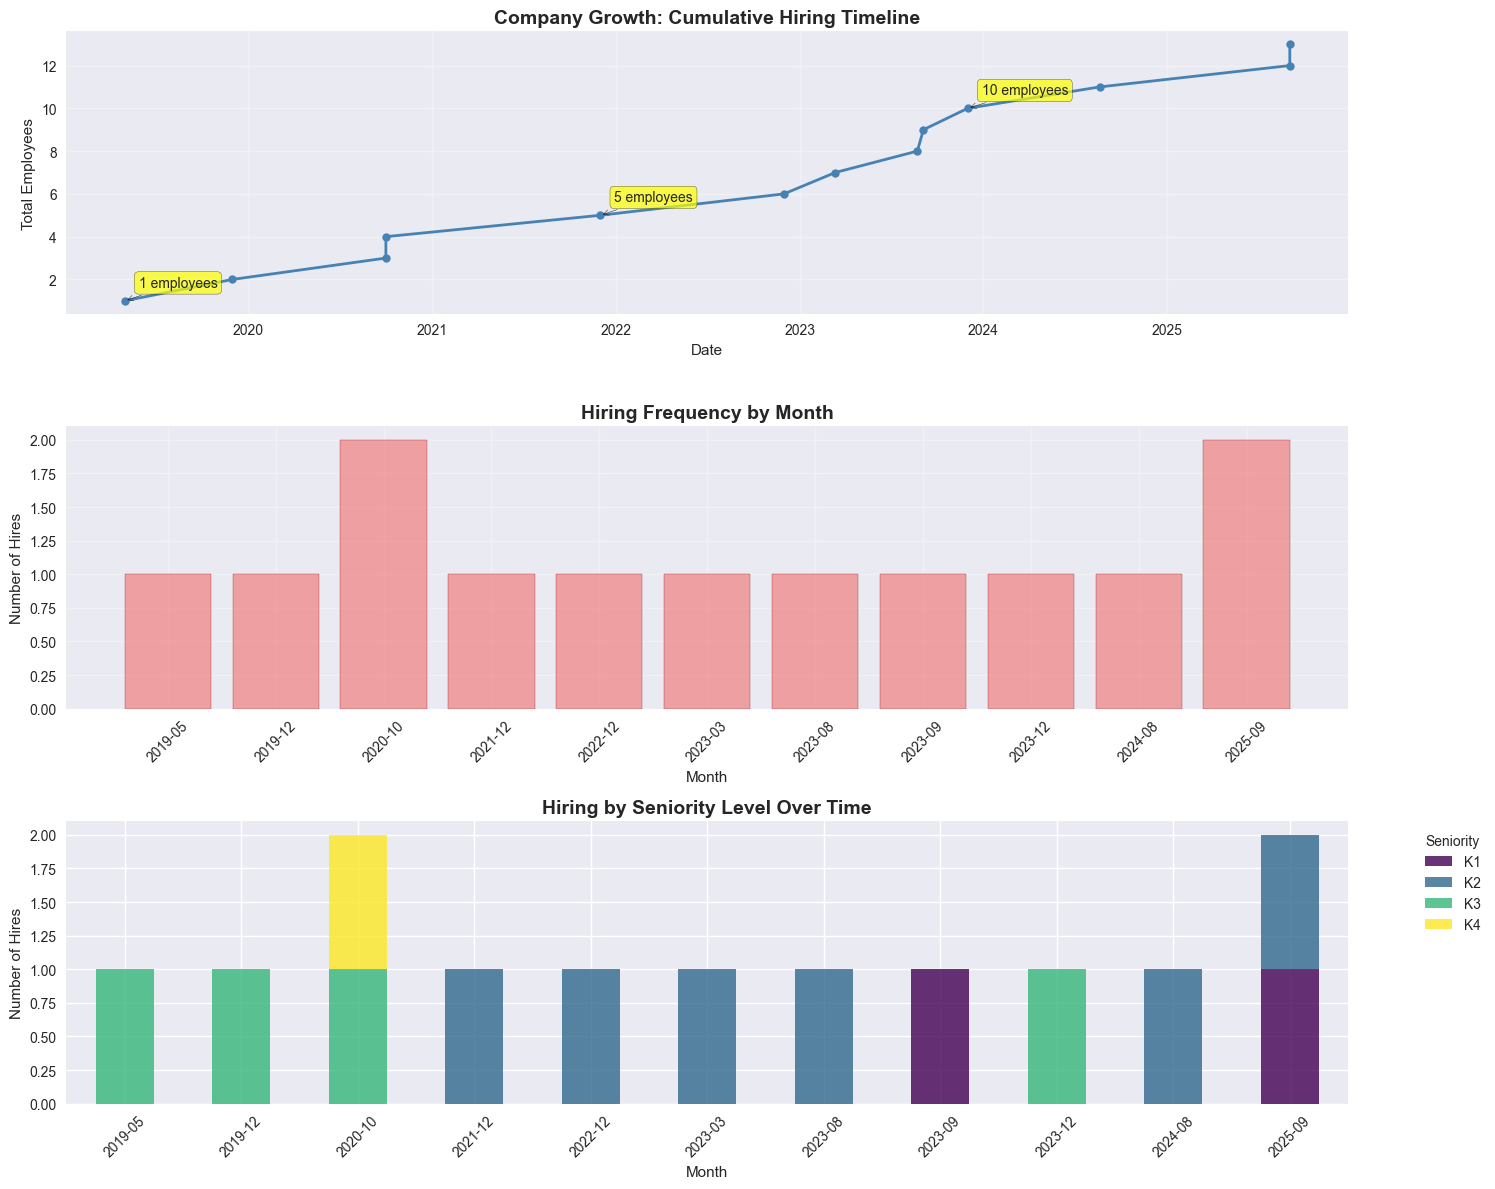

In [10]:
# Create hiring timeline visualization
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

# 1. Cumulative hiring timeline
df_timeline['hire_order'] = range(1, len(df_timeline) + 1)
ax1.plot(df_timeline['startdate_clean'], df_timeline['hire_order'], 
         marker='o', linewidth=2, markersize=6, color='steelblue')
ax1.set_title('Company Growth: Cumulative Hiring Timeline', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Employees')
ax1.grid(True, alpha=0.3)

# Add annotations for key milestones
milestones = [1, 5, 10, 15, 20]  # Adjust based on your data size
for milestone in milestones:
    if milestone <= len(df_timeline):
        milestone_date = df_timeline.iloc[milestone-1]['startdate_clean']
        ax1.annotate(f'{milestone} employees', 
                    xy=(milestone_date, milestone),
                    xytext=(10, 10), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# 2. Hiring frequency by month/year
df_timeline['hire_year_month'] = df_timeline['startdate_clean'].dt.to_period('M')
hiring_freq = df_timeline.groupby('hire_year_month').size()

ax2.bar(hiring_freq.index.astype(str), hiring_freq.values, 
        color='lightcoral', alpha=0.7, edgecolor='darkred')
ax2.set_title('Hiring Frequency by Month', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Hires')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# 3. Hiring by seniority level over time (if seniority column exists)
if 'seniority' in df_timeline.columns:
    seniority_timeline = df_timeline.groupby(['hire_year_month', 'seniority']).size().unstack(fill_value=0)
    seniority_timeline.plot(kind='bar', stacked=True, ax=ax3, 
                           colormap='viridis', alpha=0.8)
    ax3.set_title('Hiring by Seniority Level Over Time', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Number of Hires')
    ax3.tick_params(axis='x', rotation=45)
    ax3.legend(title='Seniority', bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    # Alternative: Show active vs inactive status over time if available
    if 'active' in df_timeline.columns:
        active_timeline = df_timeline.groupby(['hire_year_month', 'active']).size().unstack(fill_value=0)
        active_timeline.plot(kind='bar', stacked=True, ax=ax3, 
                           color=['lightgray', 'green'], alpha=0.8)
        ax3.set_title('Hiring by Status Over Time', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Month')
        ax3.set_ylabel('Number of Hires')
        ax3.tick_params(axis='x', rotation=45)
        ax3.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax3.text(0.5, 0.5, 'No seniority or status data available', 
                transform=ax3.transAxes, ha='center', va='center', fontsize=12)
        ax3.set_title('Additional Analysis (No Data Available)', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# I like the first graph but it needs serious visual improvements. 
# the second one is bad, I need to recheck a better way to show (if is actually interesting)
# the third is pretty bad too, perhaps a distribution of seniority levels over time. Perhaps both concepts of 1 and 3 
# can be combined into a more comprehensive distribution/timeline analysis.

In [15]:
df_hr.seniority.value_counts()

seniority
K2    6
K3    4
K1    2
K4    1
Name: count, dtype: int64